In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

visa_df = pd.read_csv(f"Visadataset.csv")
visa_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


In [2]:
num_cols = visa_df.select_dtypes(exclude='object').columns
cat_cols = visa_df.select_dtypes(include='object').columns
num_cols,cat_cols

(Index(['no_of_employees', 'yr_of_estab', 'prevailing_wage'], dtype='object'),
 Index(['case_id', 'continent', 'education_of_employee', 'has_job_experience',
        'requires_job_training', 'region_of_employment', 'unit_of_wage',
        'full_time_position', 'case_status'],
       dtype='object'))

#### Bivariate Analysis:

- We've seen Univariate analysis
- We performed Categorical column analysis
  - Frequency table (value_counts())
  - Barchart
  - Relative Frequency table (value_counts() normalized form)
  - Pie chart
- We performed Numerical column analysis
  - HIstogram
  - Distribution plots
  - Box plot
  - OUtlier analysis
  - Filling the outliers
- Now we will do Categorical vs Numerical, and Categorical vs Categorical, and Numerical vs Numerical data analysis
  

####  Categorical to Categorical data analysis
####  Let's consider 2 columns: 'continent','case_status'

In [16]:
case_status_df = visa_df['case_status']
continent_df = visa_df['continent']
print("case_status".center(50,'='))
print(case_status_df.value_counts())
print("continent".center(50,'='))
print(continent_df.value_counts())

===================case_status====================
case_status
Certified    17018
Denied        8462
Name: count, dtype: int64
====================continent=====================
continent
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: count, dtype: int64


In [25]:
# Find the Certified applications observations in 'Asia' continent
cond_status = visa_df['case_status']=='Certified'
cond_continent = visa_df['continent']=='Asia'
cond = cond_status&cond_continent
certified_df = visa_df[cond]
certified_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.65,Year,Y,Certified
5,EZYV06,Asia,Master's,Y,N,2339,2012,South,78252.14,Year,Y,Certified
6,EZYV07,Asia,Bachelor's,N,N,4985,1994,South,53635.39,Year,Y,Certified
8,EZYV09,Asia,Bachelor's,N,N,4810,2012,Midwest,74362.19,Year,Y,Certified
10,EZYV11,Asia,Master's,N,N,2465,2004,Midwest,83588.56,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.57,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.79,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.85,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.77,Year,Y,Certified


In [26]:
len(certified_df)

11012

In [51]:
# Find the Number of Certified applications observations by continentwise
cond_status = visa_df['case_status']=='Certified'
continents = visa_df['continent'].unique()
certified_count = []
for i in continents:
    cond_continent = visa_df['continent']==i
    cond = cond_status&cond_continent
    counts = len(visa_df['continent'][cond])
    print(f"Number of Certified users from continent : {i} = {counts}")
    certified_count.append([i,counts])
certified_count

Number of Certified users from continent : Asia = 11012
Number of Certified users from continent : Africa = 397
Number of Certified users from continent : North America = 2037
Number of Certified users from continent : Europe = 2957
Number of Certified users from continent : South America = 493
Number of Certified users from continent : Oceania = 122


[['Asia', 11012],
 ['Africa', 397],
 ['North America', 2037],
 ['Europe', 2957],
 ['South America', 493],
 ['Oceania', 122]]

In [52]:
# Find the Number of Denied applications observations by continentwise
cond_status = visa_df['case_status']=='Denied'
continents = visa_df['continent'].unique()
denied_count = []
for i in continents:
    cond_continent = visa_df['continent']==i
    cond = cond_status&cond_continent
    counts = len(visa_df['continent'][cond])
    denied_count.append([i,counts])
denied_count

[['Asia', 5849],
 ['Africa', 154],
 ['North America', 1255],
 ['Europe', 775],
 ['South America', 359],
 ['Oceania', 70]]

In [58]:
# Find the Number of Certified,Denied applications observations by continentwise
cond_certified_status = visa_df['case_status']== 'Certified'
cond_denied_status = visa_df['case_status']=='Denied'
continents = visa_df['continent'].unique()
certified_count = []
denied_count = []
for i in continents:
    cond_continent = visa_df['continent']==i
    cond_cert = cond_certified_status&cond_continent
    cond_den = cond_denied_status&cond_continent
    count_cert = len(visa_df['continent'][cond_cert])
    certified_count.append(count_cert)
    count_den = len(visa_df['continent'][cond_den])
    denied_count.append(count_den)
print(f"Certified count: {certified_count}")
print(f"Denied count: {denied_count}")

Certified count: [11012, 397, 2037, 2957, 493, 122]
Denied count: [5849, 154, 1255, 775, 359, 70]


In [62]:
# Create 2 DataFrames for 1.Certified and 2.Denied list by continentwise
cert_df = pd.DataFrame(zip(continents,certified_count),columns=['Continent','Certified'])
cert_df

,Continent,Certified
0,Asia,11012
1,Africa,397
2,North America,2037
3,Europe,2957
4,South America,493
5,Oceania,122


In [63]:
den_df = pd.DataFrame(zip(continents,denied_count),columns=['Continent','Denied'])
den_df

,Continent,Denied
0,Asia,5849
1,Africa,154
2,North America,1255
3,Europe,775
4,South America,359
5,Oceania,70


In [74]:
# Create single DataFrame for Certified and Denied list by continentwise
df3 = pd.DataFrame(zip(certified_count,denied_count),index=continents,columns=['Certified','Denied'])
df3

,Certified,Denied
Asia,11012,5849
Africa,397,154
North America,2037,1255
Europe,2957,775
South America,493,359
Oceania,122,70


#### Crosstab

-  ABove DataFrame, we can get using **crosstab**
-  It is available in **pandas** package
-  It takes 2 arguments: index,column
-  In above example, index=continent, column=case_status

In [72]:
df = pd.crosstab(visa_df['continent'],visa_df['case_status'])
df

case_status,Certified,Denied
continent,,
Africa,397,154
Asia,11012,5849
Europe,2957,775
North America,2037,1255
Oceania,122,70
South America,493,359


<Axes: xlabel='continent'>

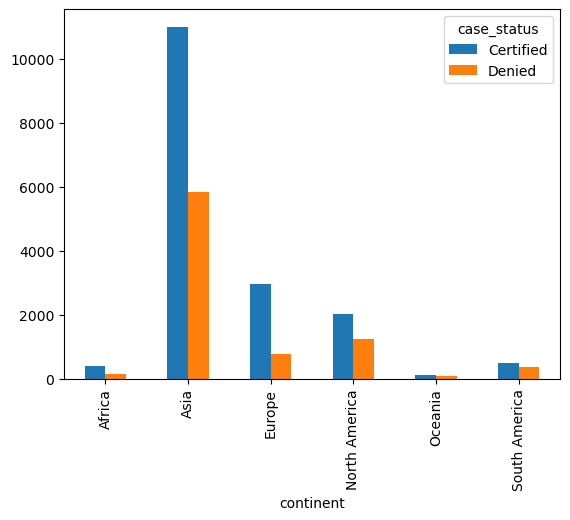

In [73]:
df.plot(kind='bar')

<Axes: >

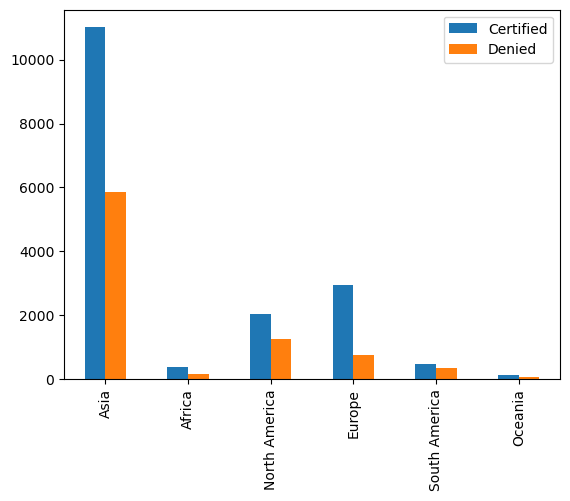

In [75]:
df3.plot(kind='bar')

### Multivariate Analysis:

- Consider 3 columns: education_of_employee education, continent, case_status
- We already know that ther are 11K are certified from Asia
- In that, we want to further breakdown based on education_of_employee
- Here also we use pd.crosstab()
   - First fix the column for index
   - Then pass remaining2 columns as a single list

#### Categorical vs Categorical data

In [81]:
index_column = visa_df['continent']
columns = [visa_df['education_of_employee'],visa_df['case_status']]
df5 = pd.crosstab(index_column,columns)
df5

education_of_employee Bachelor's        Doctorate        High School         \
case_status            Certified Denied Certified Denied   Certified Denied   
continent                                                                     
Africa                        81     62        43     11          23     43   
Asia                        4407   2761       780    143         676   1614   
Europe                      1040    259       788     58         162    328   
North America                641    584       207     51         210    191   
Oceania                       38     28        19      3          19     17   
South America                160    173        75     14          74     63   

education_of_employee  Master's         
case_status           Certified Denied  
continent                               
Africa                      250     38  
Asia                       5149   1331  
Europe                      967    130  
North America               979    429  
Oceania                      46     22  
South America               184    109

In [80]:
index_column = visa_df['education_of_employee']
columns = [visa_df['continent'],visa_df['case_status']]
pd.crosstab(index_column,columns)

continent                Africa             Asia           Europe         \
case_status           Certified Denied Certified Denied Certified Denied   
education_of_employee                                                      
Bachelor's                   81     62      4407   2761      1040    259   
Doctorate                    43     11       780    143       788     58   
High School                  23     43       676   1614       162    328   
Master's                    250     38      5149   1331       967    130   

continent             North America          Oceania        South America  \
case_status               Certified Denied Certified Denied     Certified   
education_of_employee                                                       
Bachelor's                      641    584        38     28           160   
Doctorate                       207     51        19      3            75   
High School                     210    191        19     17            74   
Master's                        979    429        46     22           184   

continent                     
case_status           Denied  
education_of_employee         
Bachelor's               173  
Doctorate                 14  
High School               63  
Master's                 109

In [78]:
index_column = visa_df['case_status']
columns = [visa_df['continent'],visa_df['education_of_employee']]
pd.crosstab(index_column,columns)

continent                 Africa                                      Asia  \
education_of_employee Bachelor's Doctorate High School Master's Bachelor's   
case_status                                                                  
Certified                     81        43          23      250       4407   
Denied                        62        11          43       38       2761   

continent                                                Europe            \
education_of_employee Doctorate High School Master's Bachelor's Doctorate   
case_status                                                                 
Certified                   780         676     5149       1040       788   
Denied                      143        1614     1331        259        58   

continent              ... North America             Oceania            \
education_of_employee  ...   High School Master's Bachelor's Doctorate   
case_status            ...                                               
Certified              ...           210      979         38        19   
Denied                 ...           191      429         28         3   

continent                                  South America            \
education_of_employee High School Master's    Bachelor's Doctorate   
case_status                                                          
Certified                      19       46           160        75   
Denied                         17       22           173        14   

continent                                   
education_of_employee High School Master's  
case_status                                 
Certified                      74      184  
Denied                         63      109  

[2 rows x 24 columns]

<Axes: xlabel='continent'>

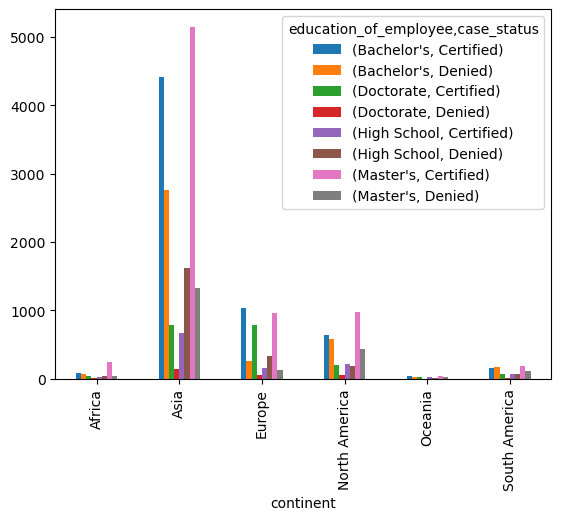

In [82]:
df5.plot(kind='bar')

#### Numerical vs Numerical data

- TO understand Numerical columns relation, we need to plot scatter plot
- ****Scatterplot**** gives the relation between Numerical data
- Bar chart - Pie chart - Histogram - SCatter plot
- ****plt.scatter()****

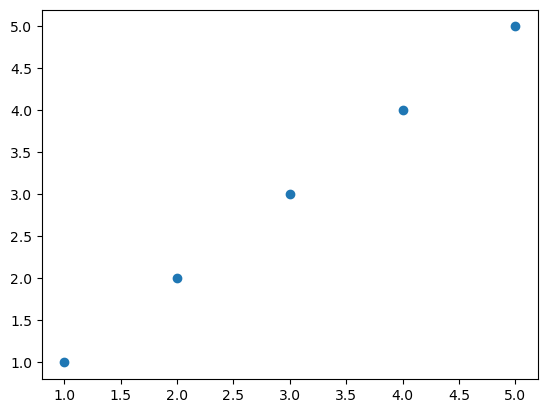

In [11]:
x=[1,2,3,4,5]
y = [1,2,3,4,5]
plt.scatter(x,y)  #Draw dots

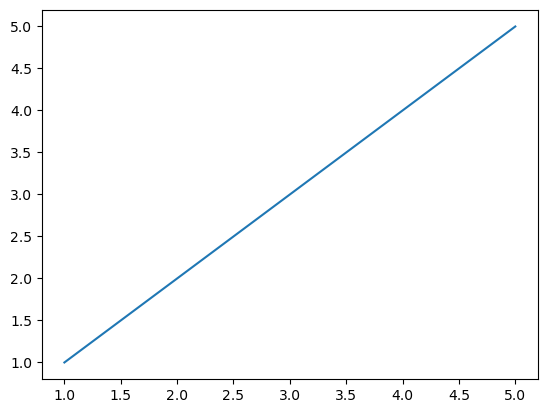

In [10]:
plt.plot(x,y) #Draws a line

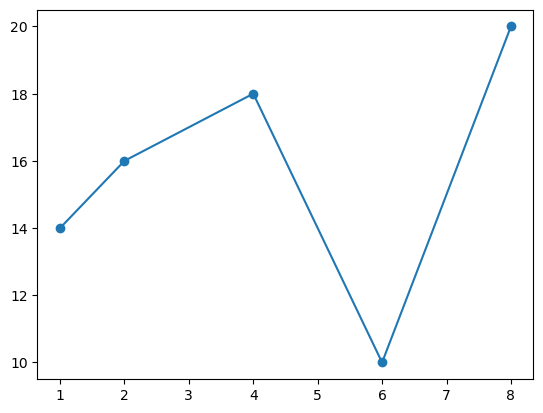

In [12]:
x = [1,2,4,6,8]
y = [14,16,18,10,20]
plt.scatter(x,y)
plt.plot(x,y)

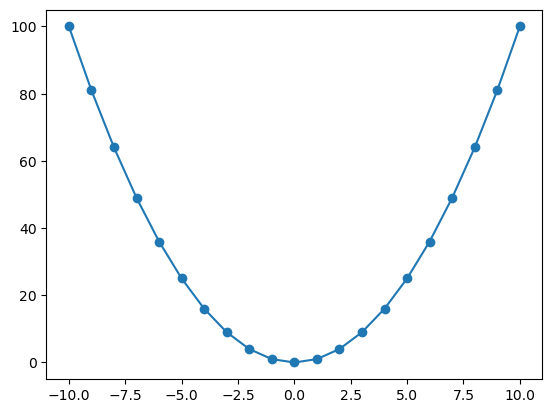

In [16]:
# Plot the Parabola
x = [i for i in range(-10,11)]
y = [i*i for i in range(-10,11)]
plt.scatter(x,y)
plt.plot(x,y)
plt.show()

In [3]:
num_cols

Index(['no_of_employees', 'yr_of_estab', 'prevailing_wage'], dtype='object')

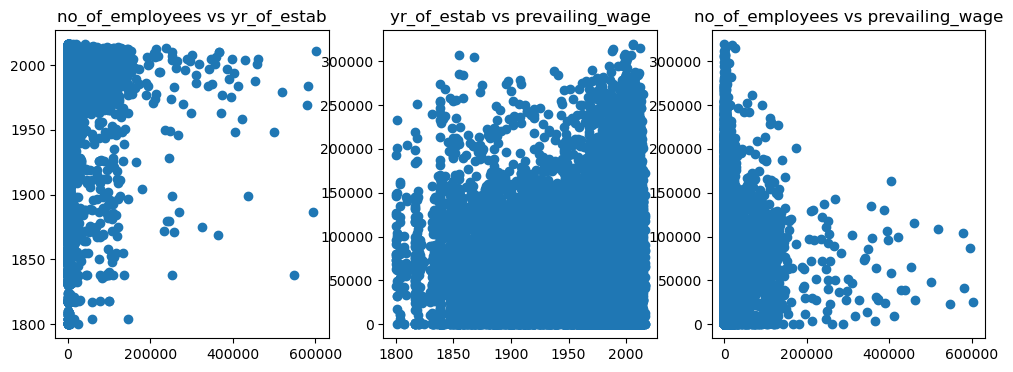

In [23]:
# Plot the Scatterplot for 2 Numerical columns
x = visa_df['no_of_employees']
y = visa_df['yr_of_estab']
z = visa_df['prevailing_wage']

plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.scatter(x,y)
plt.title("no_of_employees vs yr_of_estab")

plt.subplot(1,3,2)
plt.scatter(y,z)
plt.title("yr_of_estab vs prevailing_wage")

plt.subplot(1,3,3)
plt.scatter(x,z)
plt.title("no_of_employees vs prevailing_wage")

plt.show()

- Mean deviation
- Absolute Mean Deviation
- Variance
- Standard Deviation
- Covariance
- Correlation Coeeficient

**Covariance** tells if columns are related or not. How the columns are related (Positive relation, Negative relation, No relation)
**Corelation** tells how much the columns are related. It is denoted with 'r'
- r varies from -1 to +1
- -1 to 0=> Negative relation quantity
- 0 => No relation
- 0 to 1 => Positive relation quantity

  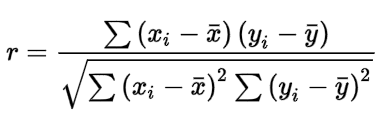


In [30]:
correlation_df = visa_df.corr(numeric_only=True)
correlation_df

,no_of_employees,yr_of_estab,prevailing_wage
no_of_employees,1.000000,-0.017770,-0.009523
yr_of_estab,-0.017770,1.000000,0.012342
prevailing_wage,-0.009523,0.012342,1.000000


#### Heat map

- Heat map is one of teh important visualization method to show the matrix form of values
- It is under seaborn package
- In every matrix, highest values and lowest values will be available
- Heat map will gives the colors visualization
- Also it provides color bar with respective values
- sns.heatmap()

<Axes: >

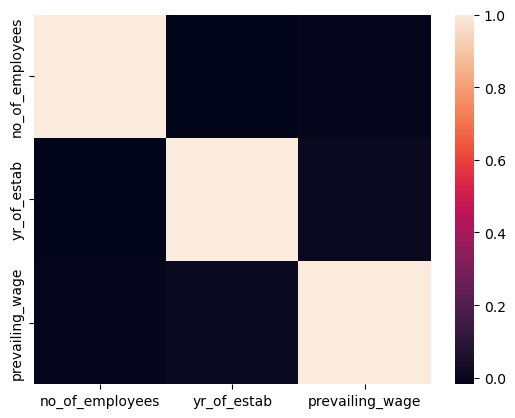

In [32]:
sns.heatmap(correlation_df)
# In this, Color bar starts from value 0. 

<Axes: >

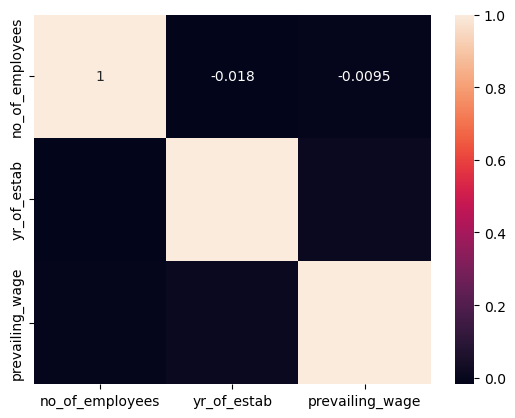

In [34]:
sns.heatmap(correlation_df,annot=True)  #annot - will display the numbers on heatmap

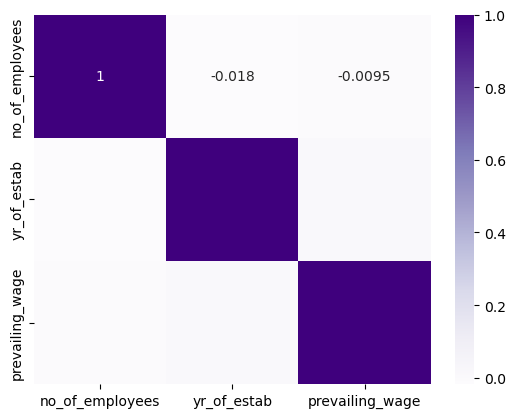

In [41]:
correlation_df = visa_df.corr(numeric_only=True)
sns.heatmap(correlation_df,cmap="Purples",annot=True) #cmap - to change the colors
plt.show()

- Byseeing above graph, we can't say relation.
- So it's best practice to get percentage of relation using Correlation
- All 3 numeric columns having approx ~0 percentage of relation. Which indicates all the columns have no relation between them.
- So they are independent to each other.
- In ML, we expect the input columns to be indepedent with each other
- Correlation method gives matrix view.
- We have 3 columns, so 3*3 = 9 fields will be there.
- If data have 20 columns, then 20*20 = 400 fields will be there
- That's why go with heatmap visualization